# Regressão polinomial com scikit-learn 

    Neste caderno, aprendemos como usar o scikit-learn para regressão polinomial. Fazemos o download de um conjunto de dados relacionado ao consumo de combustível e à emissão de dióxido de carbono nos carros. Em seguida, dividimos nossos dados em conjuntos de treinamento e teste, criamos um modelo usando um conjunto de treinamento, avaliamos nosso modelo usando um conjunto de teste e, finalmente, usamos o modelo para prever um valor desconhecido.

# Imports necessários

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Download Data

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-02-12 13:46:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolvendo s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Conectando-se a s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 72629 (71K) [text/csv]
Salvando em: “FuelConsumption.csv”

FuelConsumption.csv 100%[===================>]  70,93K  90,4KB/s    em 0,8s    

2020-02-12 13:46:51 (90,4 KB/s) - “FuelConsumption.csv” salvo [72629/72629]



# Análisando o DataFrame

In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


    Vamos selecionar alguns recursos que queremos usar para regressão.

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


    Permite traçar valores de emissão em relação ao tamanho do motor:

Text(0, 0.5, 'Emissão')

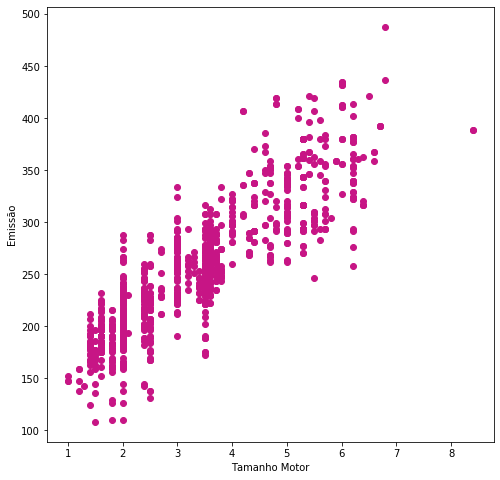

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='mediumvioletred')
plt.xlabel("Tamanho Motor")
plt.ylabel("Emissão")

# Treino e teste

    A divisão Train / Test envolve dividir o conjunto de dados em conjuntos de treinamento e teste, respectivamente, que são mutuamente exclusivos. Depois disso, você treina com o conjunto de treinamento e testa com o conjunto de testes.

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Regressão polinomial

    Às vezes, a tendência dos dados não é realmente linear e parece curvilínea. Nesse caso, podemos usar métodos de regressão polinomial. De fato, existem muitas regressões diferentes que podem ser usadas para se ajustar à aparência do conjunto de dados, como quadrática, cúbica etc., e pode continuar em graus infinitos.

    Em essência, podemos chamar tudo isso de regressão polinomial, em que a relação entre a variável independente x e a variável dependente y é modelada como um polinômio de enésimo grau em x. Vamos dizer que você deseja ter uma regressão polinomial (vamos fazer um polinômio de 2 graus):

    𝑦 = 𝑏 + 𝜃1𝑥 + 𝜃2𝑥2
    Agora, a pergunta é: como podemos ajustar nossos dados nessa equação enquanto temos apenas valores x, como Tamanho do mecanismo? Bem, podemos criar alguns recursos adicionais: 1, 𝑥 e 𝑥2.

    A função PloynomialFeatures () na biblioteca Scikit-learn, direciona um novo conjunto de recursos do conjunto original. Ou seja, uma matriz será gerada consistindo em todas as combinações polinomiais dos recursos com grau menor ou igual ao grau especificado. Por exemplo, digamos que o conjunto de recursos original tenha apenas um recurso, ENGINESIZE. Agora, se selecionarmos o grau do polinômio como 2, ele gera 3 características, grau = 0, grau = 1 e grau = 2:

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

    numpy.asanyarray() - A função é usada quando queremos converter a entrada em uma matriz, mas ela passa as subclasses ndarray . 
    As entradas podem ser escalares, listas, listas de tuplas, tuplas, tuplas de tuplas, tuplas de listas e ndarrays.
    
    fit_transform() pega nossos valores x e gera uma lista de nossos dados aumentados da potência de 0 para a potência de 2 (já que definimos o grau do nosso polinômio como 2).

    Parece que conjuntos de recursos para análise de regressão linear múltipla, certo? Sim. Faz. De fato, a regressão polinomial é um caso especial de regressão linear, com a idéia principal de como você seleciona seus recursos. Apenas considere substituir 𝑥 por 𝑥1, 𝑥21 por 𝑥2 e assim por diante. Então a equação do grau 2 seria transformada em:

    𝑦 = 𝑏 + 𝜃1𝑥1 + 𝜃2𝑥2
    Agora, podemos lidar com isso como um problema de 'regressão linear'. Portanto, essa regressão polinomial é considerada um caso especial de regressão linear múltipla tradicional. Portanto, você pode usar o mesmo mecanismo da regressão linear para resolver esses problemas.

    para que possamos usar a função LinearRegression () para resolvê-lo:

In [11]:
clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         50.92157782 -1.55163858]]
Intercept:  [106.96598047]


    Como mencionado anteriormente, Coeficiente e Interceptação, são os parâmetros da linha curva de ajuste. Dado que é uma regressão linear múltipla típica, com 3 parâmetros, e sabendo que os parâmetros são o intercepto e os coeficientes do hiperplano, o sklearn os estimou a partir de nosso novo conjunto de conjuntos de recursos. Vamos traçar:

Text(0, 0.5, 'Emissão')

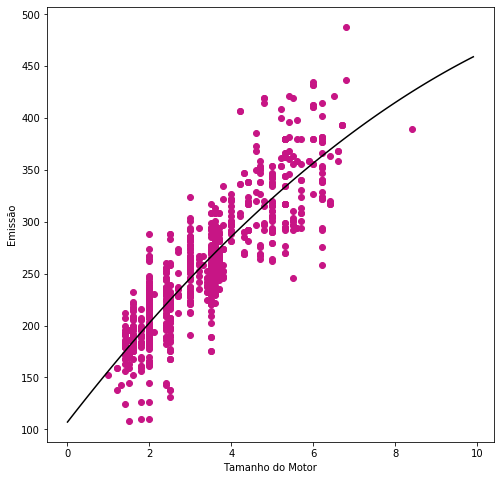

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='mediumvioletred')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)

plt.plot(XX, yy, '-k' )
plt.xlabel("Tamanho do Motor")
plt.ylabel("Emissão")

# Avaliação

In [16]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.31
Residual sum of squares (MSE): 919.86
R2-score: 0.72
